In [170]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [171]:
dta = sm.datasets.fair.load_pandas().data

In [172]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [173]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [174]:
dta = dta.drop(columns= 'affairs')

In [175]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [176]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [177]:
dta.shape

(6366, 9)

In [178]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


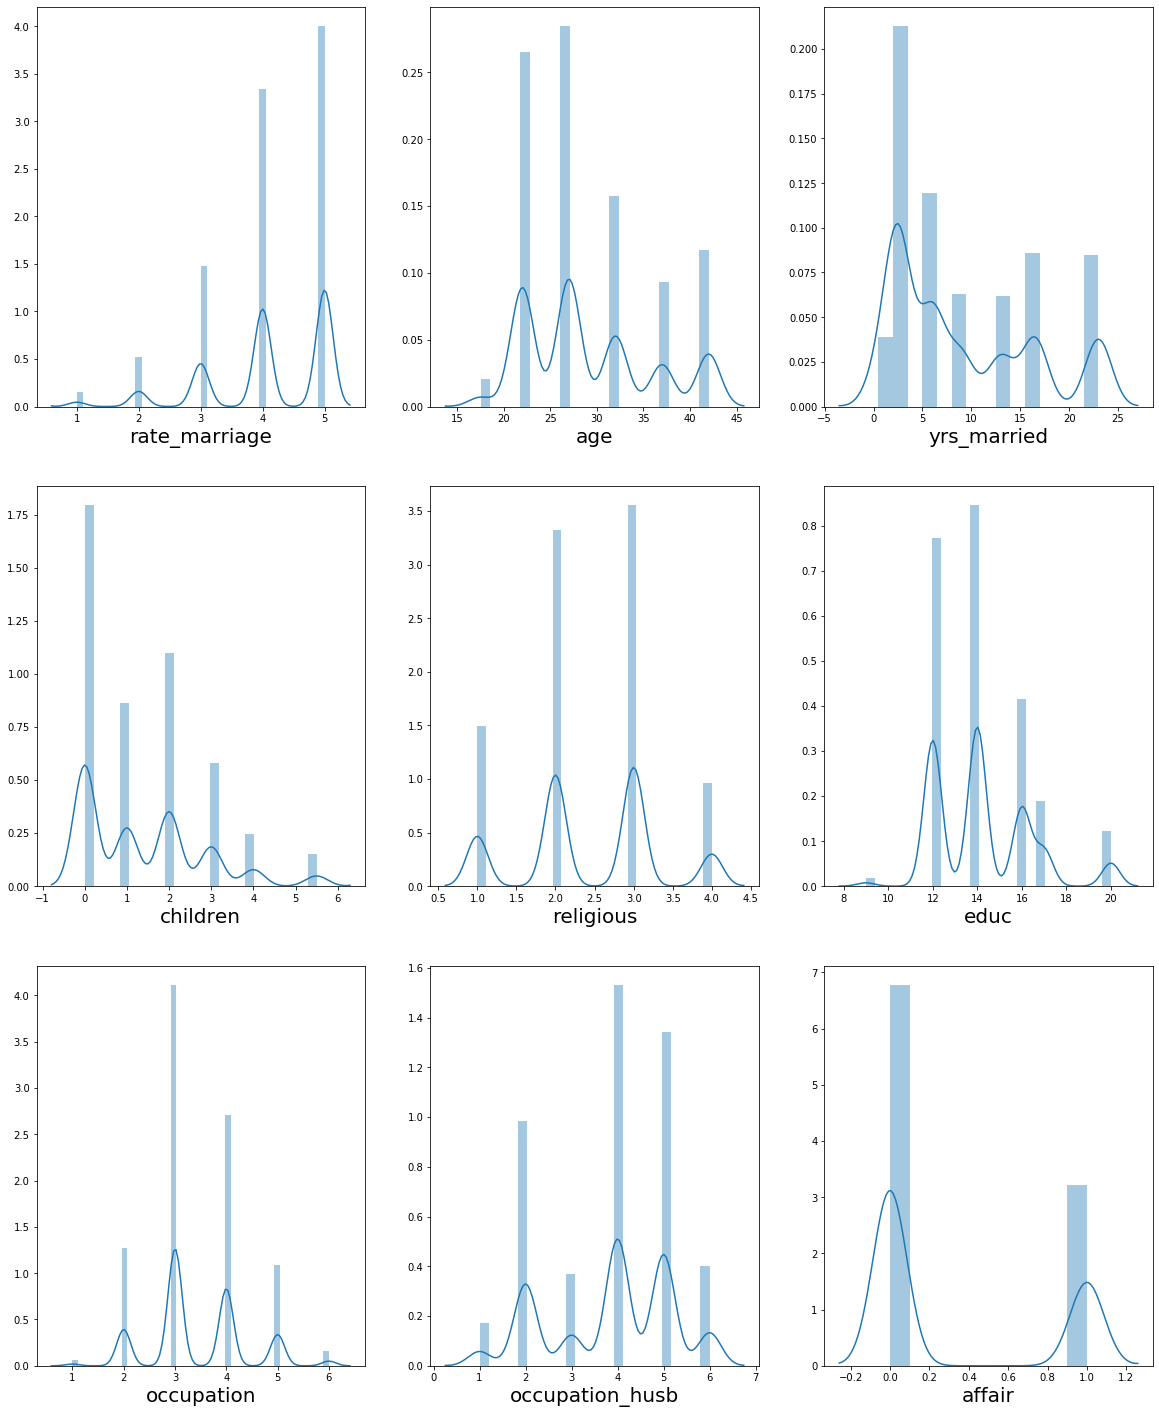

In [179]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

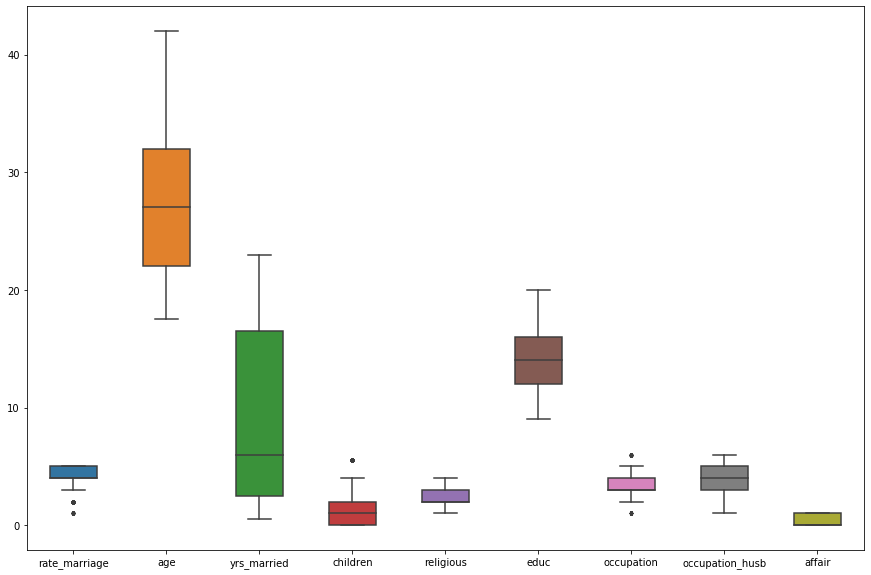

In [180]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)

In [181]:
x = dta.drop(columns = 'affair')
y = dta["affair"]

In [182]:
type(x)

pandas.core.frame.DataFrame

In [183]:
x.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb'],
      dtype='object')

In [184]:
xx=x.to_numpy()
xx

array([[ 3. , 32. ,  9. , ..., 17. ,  2. ,  5. ],
       [ 3. , 27. , 13. , ..., 14. ,  3. ,  4. ],
       [ 4. , 22. ,  2.5, ..., 16. ,  3. ,  5. ],
       ...,
       [ 5. , 22. ,  2.5, ..., 14. ,  3. ,  1. ],
       [ 5. , 32. ,  6. , ..., 14. ,  3. ,  4. ],
       [ 4. , 22. ,  2.5, ..., 16. ,  2. ,  4. ]])

In [186]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(xx,i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,16.866654,rate_marriage
1,74.512519,age
2,15.374225,yrs_married
3,4.890197,children
4,8.677125,religious
5,47.621600,educ
6,17.079562,occupation
7,9.848574,occupation_husb


In [187]:
x1= x.drop(['age', 'educ'], axis =1 )


In [188]:
x1.head()

,rate_marriage,yrs_married,children,religious,occupation,occupation_husb
0,3.0,9.0,3.0,3.0,2.0,5.0
1,3.0,13.0,3.0,1.0,3.0,4.0
2,4.0,2.5,0.0,1.0,3.0,5.0
3,4.0,16.5,4.0,3.0,5.0,5.0
4,5.0,9.0,1.0,1.0,3.0,4.0


In [189]:
xx = x1.to_numpy()
xx

array([[ 3. ,  9. ,  3. ,  3. ,  2. ,  5. ],
       [ 3. , 13. ,  3. ,  1. ,  3. ,  4. ],
       [ 4. ,  2.5,  0. ,  1. ,  3. ,  5. ],
       ...,
       [ 5. ,  2.5,  0. ,  2. ,  3. ,  1. ],
       [ 5. ,  6. ,  1. ,  3. ,  3. ,  4. ],
       [ 4. ,  2.5,  0. ,  2. ,  2. ,  4. ]])

In [190]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(xx, i) for i in range(x1.shape[1])]
vif["Features"] = x1.columns
vif

,vif,Features
0,12.293516,rate_marriage
1,6.373939,yrs_married
2,4.887333,children
3,7.973890,religious
4,11.958789,occupation
5,8.856798,occupation_husb


In [191]:
x_train,x_test,y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=1000)

In [192]:
Log_Reg_affair= LogisticRegression()
Log_Reg_affair.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
import pickle
# Writing different model files to file
with open( 'model_logReg_affair.sav', 'wb') as f:
    pickle.dump(Log_Reg_affair,f)

In [194]:
y_pred = Log_Reg_affair.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [195]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7066582914572864